<a href="https://colab.research.google.com/github/epjonnadula/Deep-Learning/blob/master/Neural_Network_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from numpy import loadtxt
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn import datasets
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
from tqdm import tqdm

Using TensorFlow backend.


In [2]:
cancer = datasets.load_breast_cancer() 
x=pd.DataFrame(cancer.data) 
y=pd.DataFrame(cancer.target) 
x=x.to_numpy() 
y=y.to_numpy() 
x=preprocessing.normalize(x, norm='l2') 
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3,shuffle=True) 
print(np.shape(train_x))


(398, 30)


In [0]:
input_size=train_x.shape[1]
hidden_size_1=30
hidden_size_2=15
output_size=1
epochs = 5000
alpha=0.01
batch_size = 100

In [4]:
x = tf.placeholder(tf.float32, [None,train_x.shape[1]], name="x")
y = tf.placeholder(tf.float32, [None,train_y.shape[1]], name="y")
print(str(x))
print(str(y))

Tensor("x:0", shape=(?, 30), dtype=float32)
Tensor("y:0", shape=(?, 1), dtype=float32)


In [5]:
w1 = tf.Variable(tf.random_normal([input_size,hidden_size_1]),name="w1")
b1 = tf.Variable(tf.random_normal([hidden_size_1]),name='b1')

w2 = tf.Variable(tf.random_normal([hidden_size_1,hidden_size_2]),name="w2")
b2 = tf.Variable(tf.random_normal([hidden_size_2]),name="b2")

w3 = tf.Variable(tf.random_normal([hidden_size_2,output_size]),name="w3")
b3 = tf.Variable(tf.random_normal([output_size]),name="b3")

print(str(w1))
print(str(b1))
print(str(w2))
print(str(b2))
print(str(w3))
print(str(b3))

<tf.Variable 'w1:0' shape=(30, 30) dtype=float32_ref>
<tf.Variable 'b1:0' shape=(30,) dtype=float32_ref>
<tf.Variable 'w2:0' shape=(30, 15) dtype=float32_ref>
<tf.Variable 'b2:0' shape=(15,) dtype=float32_ref>
<tf.Variable 'w3:0' shape=(15, 1) dtype=float32_ref>
<tf.Variable 'b3:0' shape=(1,) dtype=float32_ref>


In [0]:
z1=tf.add(tf.matmul(x,w1),b1)
a1=tf.nn.relu(z1)


z2=tf.add(tf.matmul(a1,w2),b2)
a2=tf.nn.relu(z2)

z3=tf.add(tf.matmul(a2,w3),b3)
a3=tf.nn.sigmoid(z3)
#print(str(a3))

In [7]:
#logits = tf.transpose(a3)
#labels = tf.transpose(y)
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = z3, labels = y))
optimiser = tf.train.AdamOptimizer(learning_rate=alpha).minimize(cost)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
def generate_mini_batches(x,y,batch_size):
    mini_batches = [] 
    data = np.hstack((x, y)) 
    np.random.shuffle(data) 
    nof_batches = data.shape[0] // batch_size 
    i=0
    for i in range(nof_batches + 1): 
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :] 
        mini_x = mini_batch[:, :-1] 
        mini_y = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((mini_x, mini_y)) 

    if data.shape[0] % batch_size != 0: 
        mini_batch = data[i * batch_size:data.shape[0]] 
        mini_x = mini_batch[:, :-1] 
        mini_y = mini_batch[:, -1].reshape((-1, 1)) 
        mini_batches.append((mini_x, mini_y)) 

    return mini_batches 

In [0]:
def predict_results(x,y,parameters):
    z1=np.add(np.matmul(x,parameters['w1']),parameters['b1'])
    a1=np.maximum(z1, 0)

    z2=np.add(np.matmul(a1,parameters['w2']),parameters['b2'])
    a2=np.maximum(z2, 0)

    z3=np.add(np.matmul(a2,parameters['w3']),parameters['b3'])
    a3=1/(1 + np.exp(-z3))
    calculated = np.where(a3 > 0.5, 1, 0)
    sum=0
    for i in range(len(y)):
        if y[i]==calculated[i]:
            sum=sum+1
    return sum*100/len(y)


In [10]:

init_op = tf.global_variables_initializer()
cost_list=[]
test_acc_list=[]
train_acc_list=[]
parameters={}
with tf.Session() as sess:
    sess.run(init_op)
    for epoch in tqdm(range(epochs)):
        avg_cost = 0
        mini_batches_tuples = generate_mini_batches(train_x, train_y, batch_size)
        for mini_batch in mini_batches_tuples:
            (mini_x,mini_y)=mini_batch
            _, c = sess.run([optimiser, cost], feed_dict={x: mini_x, y: mini_y})
            avg_cost=avg_cost+c
        avg_cost=avg_cost/len(mini_batches_tuples)
        cost_list.append(avg_cost)
        if len(cost_list)%1000==0:
            print("Iteration ",len(cost_list), "---> Cost ",cost_list[-1])
        parameters['w1']=sess.run(w1)
        parameters['w2']=sess.run(w2)
        parameters['w3']=sess.run(w3)
        parameters['b1']=sess.run(b1)
        parameters['b2']=sess.run(b2)
        parameters['b3']=sess.run(b3)
        test_acc_list.append(predict_results(test_x,test_y,parameters))
        train_acc_list.append(predict_results(train_x,train_y,parameters))


 20%|██        | 1010/5000 [00:12<00:46, 86.60it/s]

Iteration  1000 ---> Cost  0.07869785651564598


 40%|████      | 2017/5000 [00:24<00:33, 89.47it/s]

Iteration  2000 ---> Cost  0.06578592732548713


 60%|██████    | 3009/5000 [00:34<00:20, 95.20it/s]

Iteration  3000 ---> Cost  0.05354890301823616


 80%|████████  | 4015/5000 [00:46<00:11, 86.86it/s]

Iteration  4000 ---> Cost  0.04847112968564034


100%|██████████| 5000/5000 [00:57<00:00, 87.42it/s]

Iteration  5000 ---> Cost  0.01965231876820326


In [11]:
'''
init_op = tf.global_variables_initializer()
cost_list=[]
test_acc_list=[]
train_acc_list=[]
parameters={}
with tf.Session() as sess:
    sess.run(init_op)
    for epoch in tqdm(range(epochs)): 
        _, c = sess.run([optimiser, cost], feed_dict={x: test_x, y: test_y})
        cost_list.append(c)
        if len(cost_list)%1000==0:
            print("Iteration ",len(cost_list), "---> Cost ",cost_list[-1])
        parameters['w1']=sess.run(w1)
        parameters['w2']=sess.run(w2)
        parameters['w3']=sess.run(w3)
        parameters['b1']=sess.run(b1)
        parameters['b2']=sess.run(b2)
        parameters['b3']=sess.run(b3)
        test_acc_list.append(predict_results(test_x,test_y,parameters))
        train_acc_list.append(predict_results(train_x,train_y,parameters))
'''

'\ninit_op = tf.global_variables_initializer()\ncost_list=[]\ntest_acc_list=[]\ntrain_acc_list=[]\nparameters={}\nwith tf.Session() as sess:\n    sess.run(init_op)\n    for epoch in tqdm(range(epochs)): \n        _, c = sess.run([optimiser, cost], feed_dict={x: test_x, y: test_y})\n        cost_list.append(c)\n        if len(cost_list)%1000==0:\n            print("Iteration ",len(cost_list), "---> Cost ",cost_list[-1])\n        parameters[\'w1\']=sess.run(w1)\n        parameters[\'w2\']=sess.run(w2)\n        parameters[\'w3\']=sess.run(w3)\n        parameters[\'b1\']=sess.run(b1)\n        parameters[\'b2\']=sess.run(b2)\n        parameters[\'b3\']=sess.run(b3)\n        test_acc_list.append(predict_results(test_x,test_y,parameters))\n        train_acc_list.append(predict_results(train_x,train_y,parameters))\n'

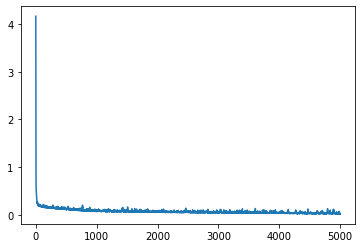

Training Cost= 0.01965231876820326


In [12]:
plt.plot(range(0,len(cost_list)),cost_list)
plt.show()
print("Training Cost=",cost_list[-1])

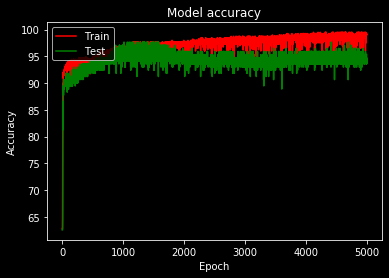

Train Accuracy= 98.99497487437186
Test Accuracy= 95.32163742690058


In [14]:
plt.style.use('dark_background')
plt.plot(train_acc_list,color='red')
plt.plot(test_acc_list,color='green')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
print("Train Accuracy=",train_acc_list[-1])
print("Test Accuracy=",test_acc_list[-1])